In [1]:
from SimPEG import *
# import sys
# sys.path.append("./simpegdc/")
import simpegDCIP as DC

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
npad = 10
cs = 2.
hx = [(cs,npad, -1.3),(cs,100+1),(cs,npad, 1.3)]
hy = [(cs,npad, -1.3),(cs,50)]
mesh = Mesh.TensorMesh([hx, hy], "CN")

circmap = Maps.CircleMap(mesh)
circmap.slope = 1e5
xr = np.linspace(-40, 40, 20)
dxr = np.diff(xr)

txList = []
zloc = -2.5

In [3]:
mesh.vnC

array([121,  60])

In [126]:
A, B = -20., 20.
src = DC.SrcDipole([],np.r_[A,cs/2.],np.r_[B,cs/2.])

survey = DC.SurveyDC([src])
problem = DC.ProblemDC_CC(mesh, mapping = circmap)

# DC.ProblemDC
problem.pair(survey)

In [127]:
sigblk, sighalf = 2e-3, 2e-3
xc, yc, r = -15, -8, 4
model = np.r_[np.log(sigblk), np.log(sighalf), xc, yc, r]

In [128]:
fields = problem.fields(model)

In [129]:
phi = fields[:]['phi_sol']

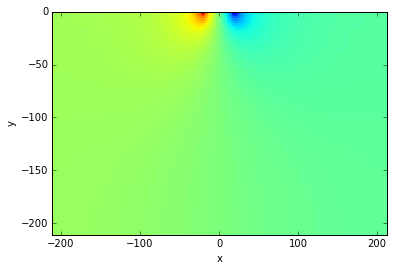

In [130]:
mesh.plotImage(phi)
plt.show()

In [131]:
x = np.arange(-40,41,dtype=float)
P = mesh.getInterpolationMat(Utils.ndgrid(x,np.r_[-1.]),'CC')
phiplt = P*phi

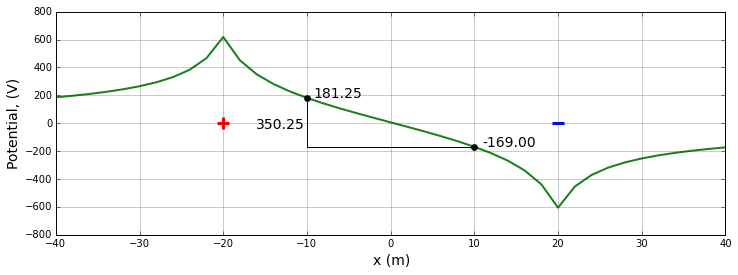

In [160]:
fig, ax = plt.subplots(1,1,figsize=(12,4))
ax.plot(x,phiplt,color=[0.1,0.5,0.1],linewidth=2)
ax.grid(which='both',linestyle='-',linewidth=0.5,color=[0.2,0.2,0.2],alpha=0.5)
ax.plot(A,0.,'+',markersize = 12, markeredgewidth = 3, color=[1.,0.,0])
ax.plot(B,0.,'_',markersize = 12, markeredgewidth = 3, color=[0.,0.,1.])
ax.set_ylabel('Potential, (V)',fontsize = 14)
ax.set_xlabel('x (m)',fontsize = 14)
ax.set_xlim([x.min(),x.max()])

M,N = -10.,10.
VM, VN = phiplt[int(M-x[0])], phiplt[int(N-x[0])]

ax.plot(M,phiplt[int(M-x[0])],'o',color='k')
ax.plot(N,phiplt[int(N-x[0])],'o',color='k')

props = dict(boxstyle='round', facecolor='grey', alpha=0.3)

if A < B:
    
    if M <= A:
        xytextM = (M-6.,VM+1)
    elif M > A:
        xytextM = (M+1.,VM+1)
    
    if N <= B:
        xytextN = (N+1.,VN+1)
    elif N > B:
        xytextN = (N+1.,VN-80)
        
elif A > B:
    print 'here'

ax.annotate('%2.2f'%(VM), xy=(M,VM), xytext=xytextM,fontsize = 14)
ax.annotate('%2.2f'%(VN), xy=(N,VN), xytext=xytextN,fontsize = 14)

ax.plot(np.r_[M,N],np.ones(2)*VN,color='k')
ax.plot(np.r_[M,M],np.r_[VM, VN],color='k')
ax.annotate('%2.2f'%(VM-VN) , xy=(M,(VM+VN)/2.-1), xytext=(M-6,(VM+VN)/2.-40.),fontsize = 14)

In [73]:
m0 = np.r_[np.log(sighalf), np.log(sighalf), xc, yc, r]
dini = survey.dpred(m0)
mtrue = np.r_[np.log(sigblk), np.log(sighalf), xc, yc, r]
dpred  = survey.dpred(mtrue)
xi, yi = np.meshgrid(np.linspace(xr.min(), xr.max(), 120), np.linspace(1., nmax, 100))
appres = dpred/dini/sighalf

81

35.0